-----------------------------------------------------
# Game of Thrones dataset analysis
-----------------------------------------------------
It's a homework of FDA course.(HW1 PART2)
>dataset: https://www.kaggle.com/mylesoneill/game-of-thrones <br><br>
As a fan of the sereis 'Game of Thrones', I'm excited to find some insight to this dataset.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Using Pandas to read data from csv files

In [103]:
battles = pd.read_csv('./gameofthrone_dataset/battles.csv')
deaths = pd.read_csv('./gameofthrone_dataset/character-deaths.csv')

------
## 1. 'battles.csv'
We first take a look at the data 'battles.csv'.

In [10]:
type(battles)

pandas.core.frame.DataFrame

In [15]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [7]:
battles.shape

(38, 25)

In [8]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

## See the correlation of the numeric columns
We see that attacker size and defender size have high relation.

In [129]:
corr_of_battles = battles.describe(include=[np.number])  #Including only numeric columns in a DataFrame description.
corr_of_battles = corr_of_battles.drop("defender_3",axis=1)
corr_of_battles = corr_of_battles.drop("defender_4",axis=1)
corr_of_battles = corr_of_battles.drop("summer",axis=1)

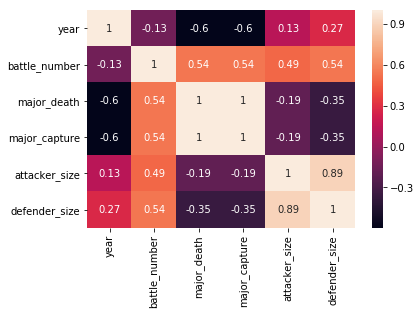

In [131]:
sns.heatmap(corr_of_battles.corr(),annot=True)

## Filter some uncompleted data, and remain those that might be helpful.

In [21]:
battles = battles[['name','year','attacker_king','defender_king',
         'battle_type','attacker_commander','defender_commander',
         'location','attacker_outcome']]

## See the relation of attacker_king and defender_king
We can see that the Stark and Baratheon have the most fights,<br>
which is reasonable after all, because the two families are main roles.    

pandas.core.frame.DataFrame

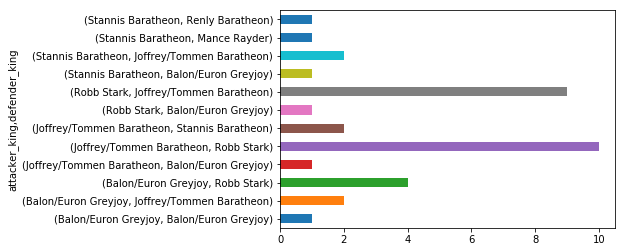

In [36]:
battles.groupby(['attacker_king', 'defender_king']).count()['name'].plot(kind = 'barh') 
# I use pandas.dataframe.groupby & .count .plot here
# ‘barh’ : horizontal bar plot

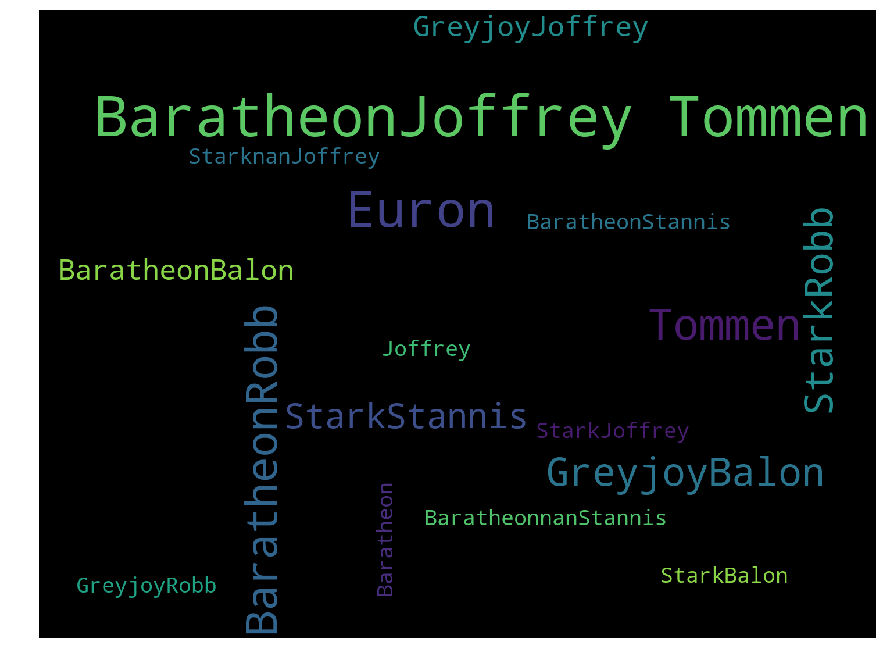

In [96]:
from wordcloud import WordCloud

attackers2 = battles['attacker_king'].values.tolist()
attackers2 = ''.join(str(x) for x in attackers2)

cloud = WordCloud(width=1440, height=1080, relative_scaling=0.5).generate(attackers2)
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()